# Wavefront Propagation and PSF simulation with Scoob
The scoobPSF package builds a layer on-top of poppy that is specific to the scoob optical bench.
This notebook demonstrates how to simulate monochromatic PSFs and wavefronts with the scoobPSF package. <br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from importlib import reload

import poppy

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import scoobpsf
from scoobpsf.math_module import xp, _scipy
from scoobpsf.imshows import *
from scoobpsf import scoob

In [4]:
reload(scoob)
model = scoob.SCOOBM()

No OPD data implemented into model.
Using default Gaussian influence function.
Using reflection when computing OPD.


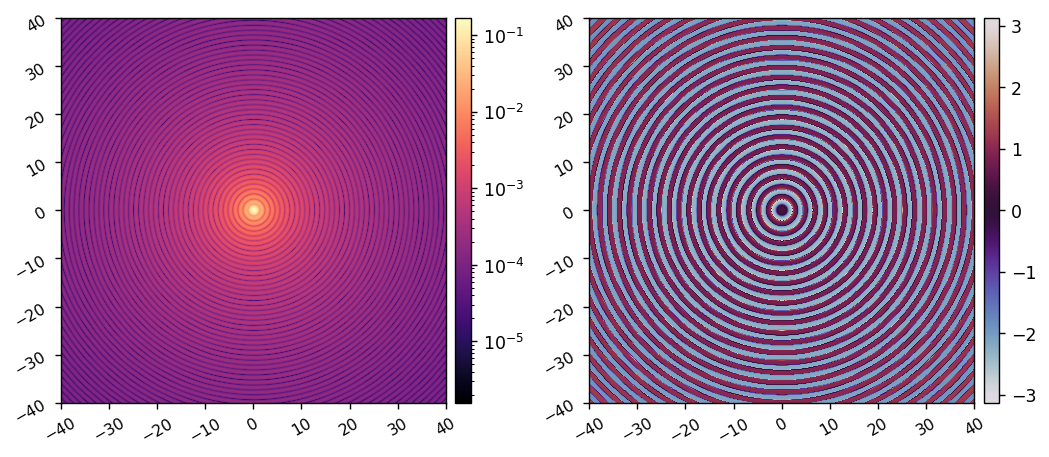

In [5]:
imwf = model.calc_wf(plot=True)

No OPD data implemented into model.
Using default Gaussian influence function.
Using reflection when computing OPD.
Propagating wavelength 632.800 nm.
PSF calculated in 0.115s


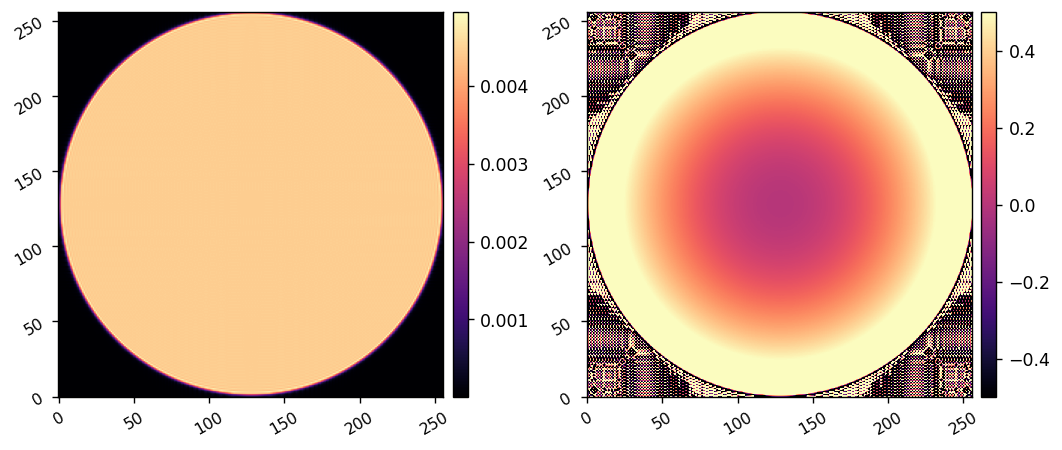

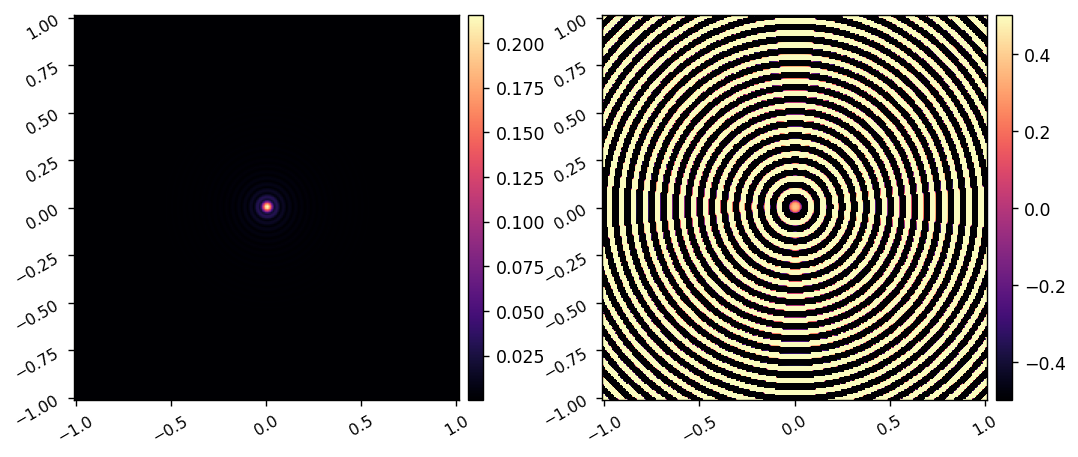

In [6]:
reload(scoob)
model = scoob.SCOOBM()
wfs = model.calc_wfs()

imshow2(wfs[4].amplitude, wfs[4].phase, npix=model.npix, vmin2=-0.5, vmax2=0.5)
imshow2(wfs[7].amplitude, wfs[7].phase, npix=model.npix, vmin2=-0.5, vmax2=0.5, pxscl=wfs[7].pixelscale.to(u.mm/u.pix))

In [109]:
wfs[7].focal_length

<Quantity -0. m>

In [110]:
wfs[7].param_str

'w_0:2.005e-05 m, z_w0=1.531e+00 m\nz=1.531e+00 m, z_r=1.995e-03 m'

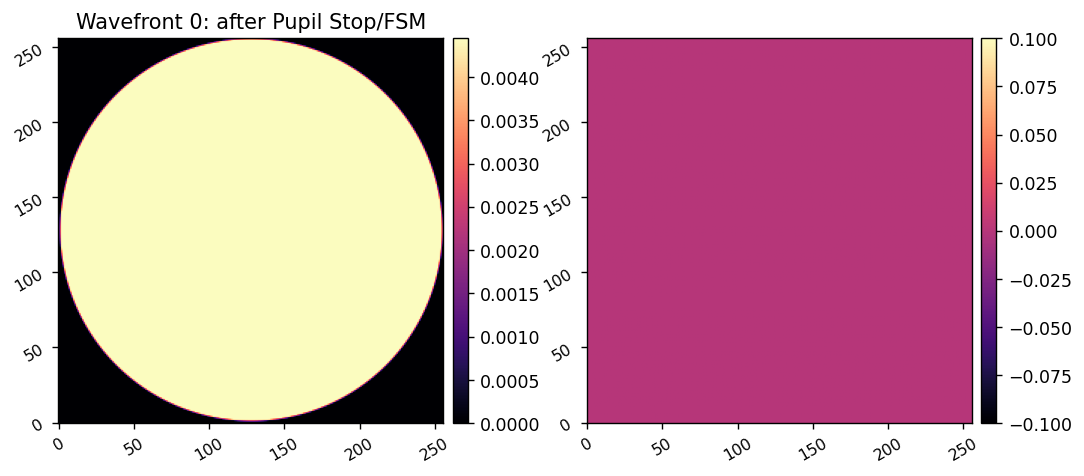

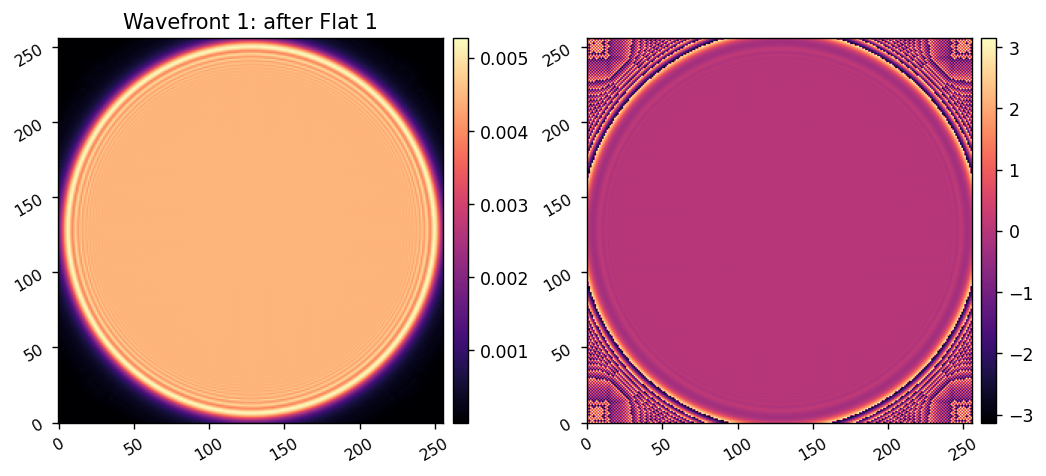

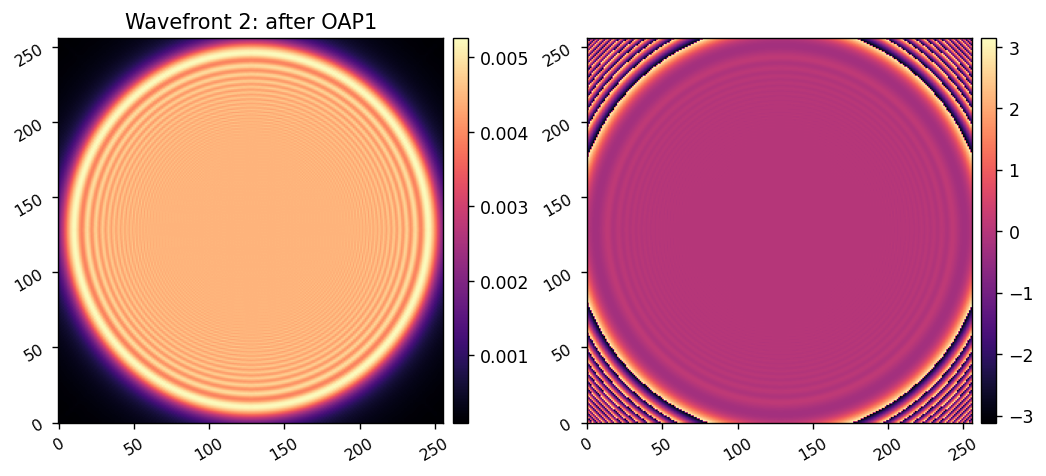

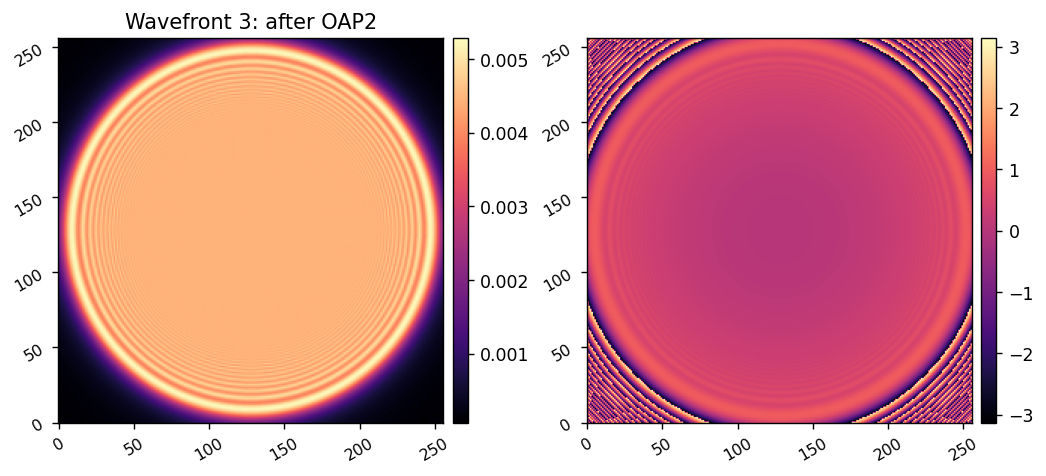

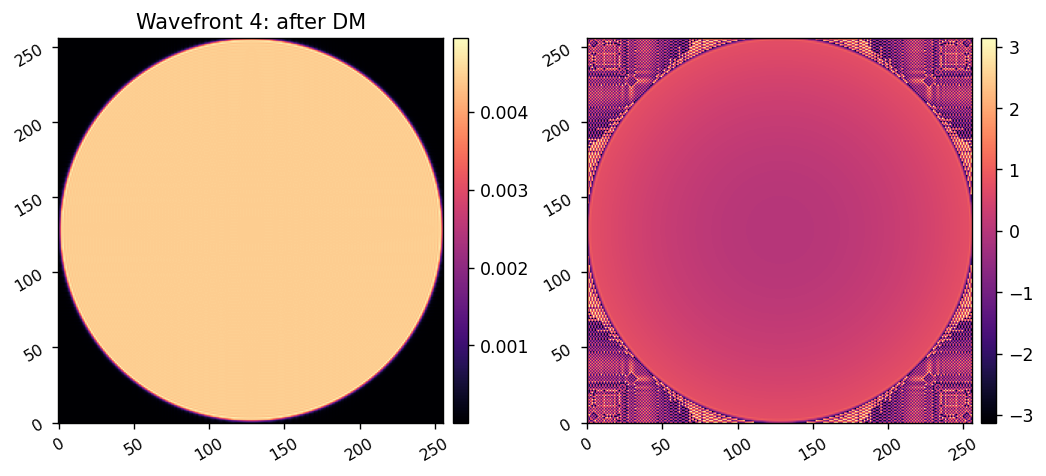

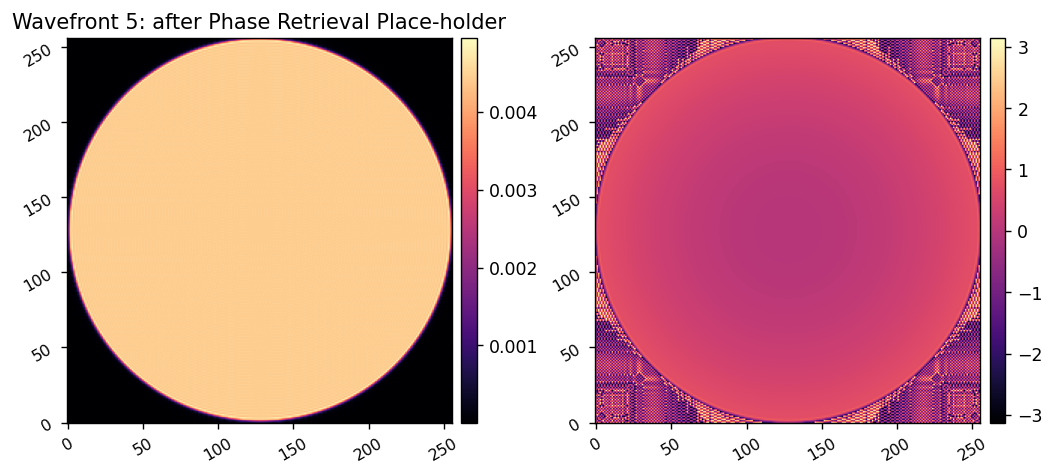

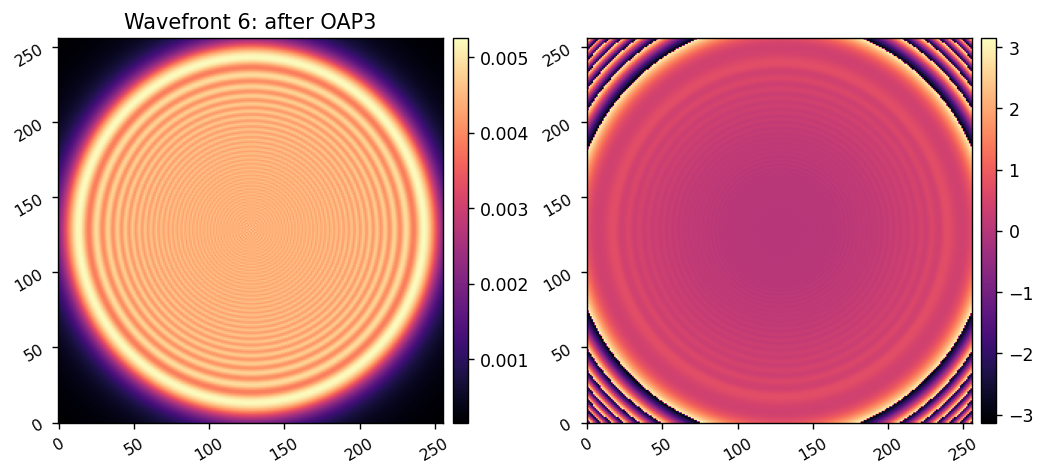

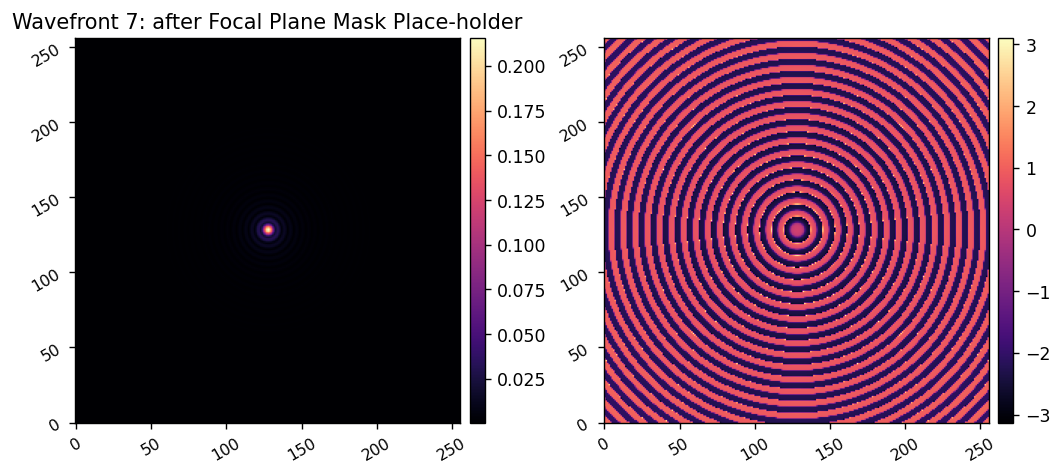

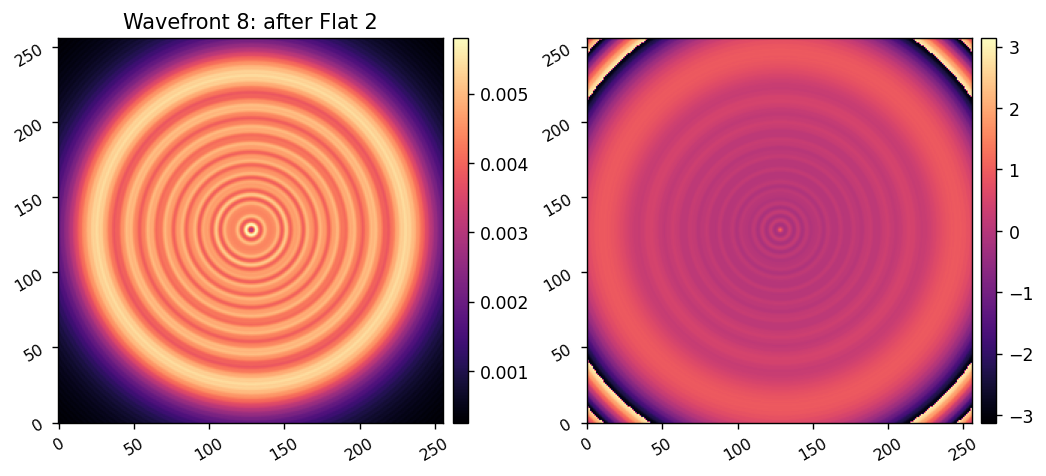

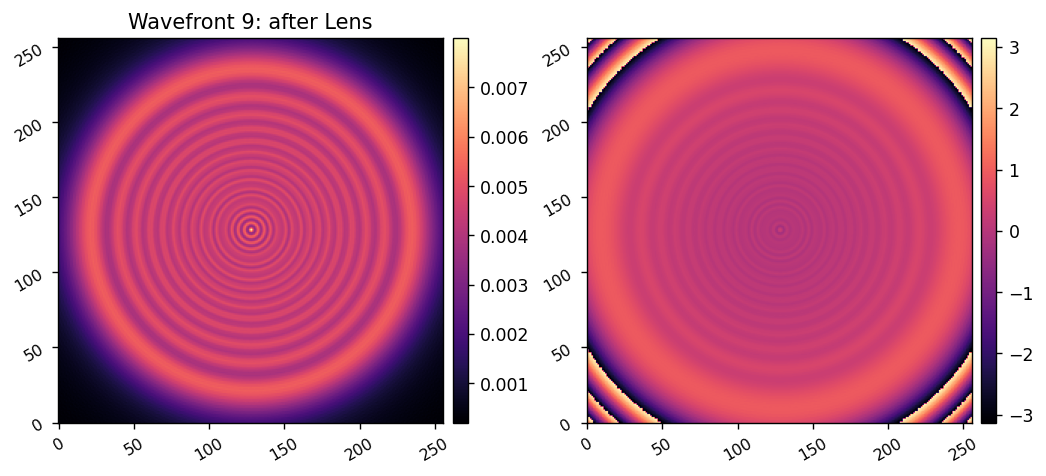

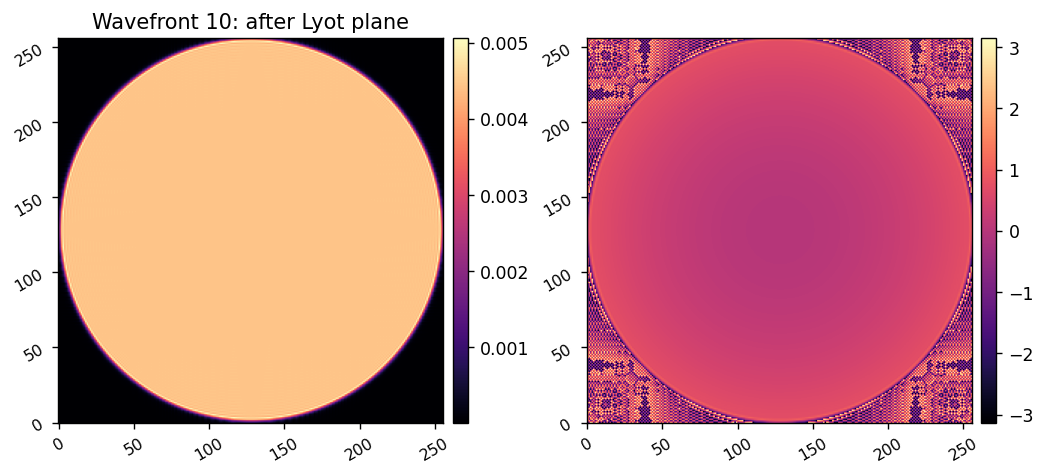

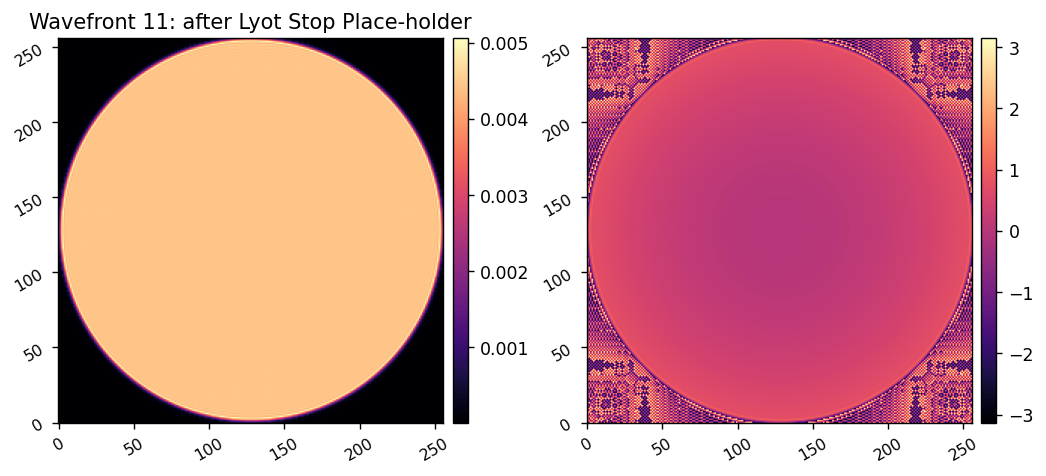

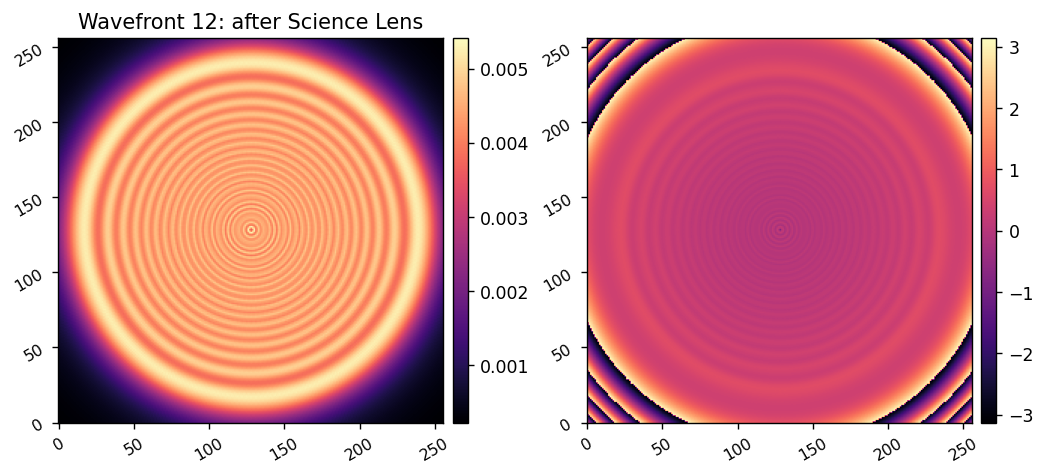

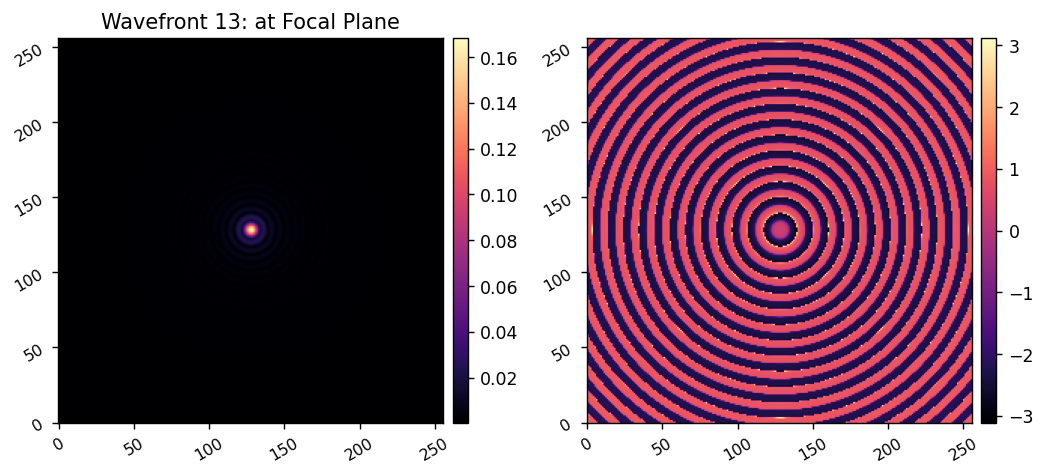

In [7]:
for i in range(len(wfs)):
    if 'focal plane' in wfs[i].location.lower() or 'detector' in wfs[i].location.lower():
        pass
    else:
        npix = model.npix
    imshow2(wfs[i].amplitude, wfs[i].phase, f'Wavefront {i}: ' + wfs[i].location, npix=model.npix)
    